---
title: Hinge experiment   
permalink: /posts/2018/06/hinge-experiment    
date: 2018-06-03    
tags:   
    - data-science
    - coding
---

A couple of months ago, I was having dinner with a friend who was trying to convince me to start online dating - he's a hopeless romantic, and perhaps the only person on this earth who genuinely enjoys it. I really dislike online dating for many reasons and we'd had this conversation many times before, so I wasn't interested in his arguments. But as he was telling me about the new [app](https://hinge.co/) he was using, an idea started to form... Because of the way the app is set up, I realized I could test one of my longtime hypotheses, and in the process get some much-needed validation for why online dating sucks and definitively win our debate about whether or not I should sign up.

Unlike normal online dating apps, the new app he was telling me about, [Hinge](https://hinge.co), doesn't let you "like" an entire profile - rather, you choose one photo or info snippet to like on the entire profile. You can also leave a comment on the thing you like, which is actually a great way to start conversations. I was intrigued by the idea of the app, but even more so by the data science opportunity this presented!

See, one of the main reasons that I dislike online dating is that I think it's too difficult to align what I like about myself with what the people I like actually like about me, and even more so difficult to ensure that the profile content reflects those things. Furthermore, I'm fairly convinced that the majority of men on the internet are not looking for someone like me - they want a pretty generic woman who fits standard ideals of beauty, intelligence, humor, behavior, etc. In other words, I'm bad at online dating and I want some validation for why that is. :P

As my friend was telling me about all the wonderful people he'd gone on dates with, I told him instead to focus on the thing I was getting super excited about: running an experiment to test this second hypothesis. We wrapped up our dinner and headed home to make my profile. We set it up so half of my photos were super generic millenial woman - very #basic - and so the other half were very "me" - reflective of the parts of my personality I _want_ people to be attracted to.

Here's some examples of the two extremes:

![](basic_examples.png)

We decided that I would track which photo or blurb on my profile each person liked, the "basic"ness level of the content they liked, and whether or not I liked them back. Later, I also added a sort of "ranking" for how much I liked each potential suitor (mostly because I ended up barely ever liking anyone back, so needed to get some data with a bit more variance!) To keep my own sanity, I didn't track the "basic"ness of the people _I_ was liking, though that would have been fun to compare. I do wonder if my "match percent" is higher (or lower!) among people who liked me first than among the general population. But alas, a woman can only collect so much data...

In [1]:
import pandas as pd
import scipy.stats as sp

from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Hinge - Claire.csv')
df = df.dropna(how='all', axis=1)
df['date'] = pd.to_datetime(df['Date entered'] + '/18')
df = df.rename(columns={'how basic? (1 = basic white girl, 4 = claire as af)': 'basicness'})
df.tail()

,Date entered,Person,which type?,description,basicness,Comment left?,Did I match him?,"Did I like him (1=no, 4=yes)",Unnamed: 8,Unnamed: 10,date
142,5/7,Pratap,photo,cuba-smiling-first-photo,3,NaN,n,2.0,"physical, short-profile",NaN,2018-05-07
143,5/7,Yashar,photo,bali-bird-claire-face,4,NaN,n,2.0,"physical, old(35)",NaN,2018-05-07
144,5/7,Cenk,photo,drunk-claire-and-jaz,1,NaN,n,2.0,"physical, mit-grad-student",NaN,2018-05-07
145,5/7,Ezra,photo,cuba-smiling-first-photo,3,NaN,n,2.0,"physical, young(23)",NaN,2018-05-07
146,5/7,Pablo,photo,bali-bird-claire-face,4,NaN,n,2.0,NaN,NaN,2018-05-07


First, let's take a look at our data. How many people liked me, and did they like photos or comments? 

### Total suitors

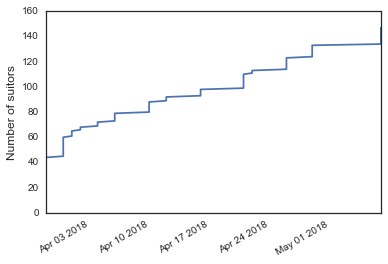

In [2]:
sns.set_style('white')

# Get total number of suitors
df['n'] = 1
df['n_cumsum'] = df['n'].cumsum()
df.plot(x='date', y='n_cumsum', legend=False)
plt.ylabel('Number of suitors', fontsize='large')
plt.xlabel('')

In [3]:
df.groupby('date').sum()['n'].head(3)

date
2018-03-29    44
2018-03-31    16
2018-04-01     5
Name: n, dtype: int64

In total, I had 147 people like me (we'll call these "suitors") over the course of the ~40-day experiment. The first few days of the experiment were a little overwhelming - on the first day collecting data, I entered over 40 suitors! Thankfully, the pace slowed down considerably after that. I'm not sure I would have been able to continue otherwise!

In [4]:
df.groupby('which type?').size()

which type?
comment     30
photo      117
dtype: int64

The majority of likes (~80%) were for photos, though there were also some suitors who liked one of my short answers to the prompts given by Hinge.

### Match rate

In [5]:
df.groupby('Did I match him?').size()

Did I match him?
n    137
y     10
dtype: int64

I did not like back the vast majority of my suitors - I said "yes" to 10 of the 147 suitors. That's a 6.8% rate, slightly less than the [MIT undergrad admission rate](http://mitadmissions.org/apply/process/stats)! That said, I don't think this is actually an honest reflection of how picky I am (though I am picky!) - I'm pretty sure it's actually a better reflection of my distaste for online dating...

### The experiment

Okay, enough of this data exploration - let's get to the meat of it! Does the data support my hypothesis that people on the internet just want a generic woman - can I feel completely validated in my distaste for online dating, or do I need to find a better excuse??!

I rated each part of my profile on a scale from 1 to 4, where 1 was the most generic/basic (i.e. a blurry photo of me and my friend drunk in a bar or a silhoeutte of me walking on the beach) and 4 was the most Claire (i.e. mostly photos of me making funny faces). Let's see...

In [86]:
df.groupby(['description', 'basicness']).size()

description                                   basicness
bali-bird-claire-face                         4            21
beach-body-silhouette                         1             8
cambodia-farm-girl-claire                     4             1
candy-crush                                   2             1
cuba-smiling-first-photo                      3            47
drunk-claire-and-jaz                          1            15
graduation-tongue-sticking-out                4             2
great-use-of-emojis                           1             6
                                              2             7
motorcycle-claire-laos                        3            10
open-communication-shared-puns-relationship   1             7
posed-angkor-wat-photo                        1             8
sending-postcards-award                       4             5
shelby-and-claire-ptown                       2             4
whiskey-friends-and-frisbee-simple-pleasures  1             5
dtype: int64

Oops, it looks like I labeled the same short answer with two different ratings. This question was "I'm weirdly attracted to..." and "Great use of emojis" was literally the suggested response - definitely a 1 rating.

In [6]:
df.loc[df.query('description == "great-use-of-emojis"').index, 'basicness'] = 1

In [7]:
df.drop_duplicates(['description', 'basicness'])[['description', 'basicness']].sort_values(by='basicness')

,description,basicness
1,drunk-claire-and-jaz,1
7,great-use-of-emojis,1
14,beach-body-silhouette,1
83,posed-angkor-wat-photo,1
90,open-communication-shared-puns-relationship,1
91,whiskey-friends-and-frisbee-simple-pleasures,1
0,shelby-and-claire-ptown,2
32,candy-crush,2
4,motorcycle-claire-laos,3
5,cuba-smiling-first-photo,3


So we're actually going to flub some of the analysis here, because the experiment wasn't totally cleanly set up (hey, come on this isn't my day job...) I was planning on hating this a lot less and running more experiments (or at least changing up my photos more often), but I ended up just lasting long enough to switch around my photos once. After my first profile creation night with my friend, I did one more round of edits with another friend, where we removed some of the intermediate photos and replaced them with more "extreme" examples. So the distribution of "basicness" ratings in my profile aren't exactly even, and did change a bit throughout the course of the experiment. For now, I'm going to completely ignore this caveat and proceed regardless. This isn't rocket science, it's just a dumb thing I did for fun! :P

## Which Claire?

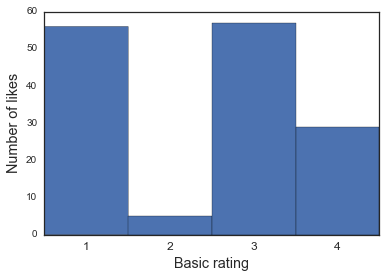

In [8]:
fig, ax = plt.subplots()
ax.hist(df['basicness'], bins=range(1, 6))
ax.set_xticks([1.5, 2.5, 3.5, 4.5])
ax.set_xticklabels([1,2,3,4], fontsize='large')
ax.set_xlabel('Basic rating', fontsize='x-large')
ax.set_ylabel('Number of likes', fontsize='x-large')

Hm, looks like this _could_ be consistent with uniform sampling from the given photos... Let's see what the probability of getting this distribution from a multinomial distribution seeded with the distribution of categories on my profile.

In [9]:
def count_basics(df):
    """
    Count the number of profile items per basic rating, proportion of items, and 
    total number of 'likes' per category.
    """
    prof_count = df.drop_duplicates(['description', 'basicness']).groupby('basicness').size()
    prof_prop = (df.drop_duplicates(['description', 'basicness']).groupby('basicness').size() 
        / df.drop_duplicates(['description', 'basicness']).shape[0])
    likes = df['basicness'].value_counts(sort=False)

    res = pd.concat([prof_count, prof_prop, likes], axis=1)
    res.columns = ['profile_count', 'profile_proportion', 'number_likes']
                    
    return res

In [10]:
count_basics(df)

,profile_count,profile_proportion,number_likes
basicness,,,
1,6,0.428571,56
2,2,0.142857,5
3,2,0.142857,57
4,4,0.285714,29


In [11]:
rv = sp.multinomial(147, [0.43, 0.14, 0.14, 0.29])
rv.pmf([56, 5, 57, 29])

4.962898960000889e-18

Hm, I'm not sure I trust this result - I think a lot of the significance may be driven by the abnormally low number of "2" ratings. But I actually removed any profile items with a basic rating of 2 after my first round of edits. What do the numbers look like if we ignore these?

In [12]:
count_basics(df.query('basicness != 2'))

,profile_count,profile_proportion,number_likes
basicness,,,
1,6,0.500000,56
3,2,0.166667,57
4,4,0.333333,29


In [13]:
rv = sp.multinomial(142, [0.5, 0.17, 0.33])
rv.pmf([56, 57, 29])

2.184134160669811e-12

Looks like these are still distributed differently than you'd expect by chance. But this isn't that interesting - I actually have two more specific questions:

1. Do people like "basic millenial white girl" Claire or "Claire Claire" better?   
2. Do people just like the first photo and then screen me later?

To answer the first question, we can just see whether I get a different number of "likes" for each category than you'd expect:

In [15]:
keep = [1, 4]
count_basics(df.query('basicness == @keep'))

,profile_count,profile_proportion,number_likes
basicness,,,
1,6,0.6,56
4,4,0.4,29


So the probability of getting 29 or fewer likes with a rating of "4" in 85 total likes that are either 1 or 4 (given that I would expect 40% to be "4", if likes were given randomly) is:

In [27]:
sp.binom.cdf(k=29,       # Probability of k = 29 likes or fewer with rating "4" 
             n=85,       # With 85 total likes (56 + 29)
             p=0.4)      # And success ("4") probability 0.6

0.15955216170354825

Ah, okay fine - I'm wrong. People on the internet aren't significantly more attracted to "basic" Claire than "Claire" Claire. hrmph.

## Lazy suitors

Maybe the data will say what I want for the second question: I noticed that the majority of "likes" were for things with a rating of 3, which was really only my first photo: 

<img src="smiling_in_cuba.jpeg" style="width: 200px;"/>

This is consistent with the hypothesis that most guys just go through and like every single person, and only _after_ they get a response do they bother screening people out, which is something I've heard is pretty common (from my male friends who do it themselves, hah).

This is another thing I don't like about online dating: it's so strategic! It also sucks because I (naively) expect that when someone likes my profile and I reply to them, I'll get a reply back. But that turned out not to be the case. In fact, I wish I'd tracked my response rate to my messages, because I feel like it was really low! So although men and women are screened at different places, I think that both groups (except perhaps the traditionally physically attractive people) get very few successful matches.

Okay, let's do the same thing as before but comparing "yes 3" and "not a 3". Let's get rid of the 2's again, and replace 1's and 4's with "not-3".

In [97]:
count_basics(df.query('basicness != 2').replace(1, 'not-3').replace(4, 'not-3'))

,profile_count,profile_proportion,number_likes
3,2,0.166667,57
not-3,10,0.833333,85


So the probability of getting 85 or fewer likes with a rating of "not 3" in 142 total likes (given that the expected proportion of 83% of likes, if likes were given randomly) is:

In [29]:
sp.binom.cdf(k=85,       # Probability of k = 85 likes or fewer with rating "not 3" 
             n=142,      # With 142 total likes (57 + 85)
             p=0.83)      # And success ("not 3") probability 0.17

6.069204228628914e-11

Aha! People *are* super lazy and disproportionately like the first photo over all others. Take that, internet!

Okay, now for one last analysis: who are these guys, anyway?

## The suitors

A small caveat here that I didn't start rating the suitors until a bit into the experiment, so there will be fewer here than above.

In [98]:
df = df.rename(columns={'Did I like him (1=no, 4=yes)': 'his_basic'})

First, how many of the different ratings did I give out?

In [39]:
df['his_basic'].value_counts()

2.0    52
3.0    25
1.0    24
Name: his_basic, dtype: int64

Hah! I didn't give anyone a "4" rating!! That's pretty hilarious, and definitely shows my bias _against_ online dating - I don't have the prior probability for what I'd _expect_ this distribution to be, but I'm pretty sure that I like at least one person out of each ~150 that I meet in real life. 

Okay, but I did match _some_ people - who were they, what did they have in common?

In [49]:
df = df.rename(columns={'Did I match him?': 'match', 'Unnamed: 8': 'why_match'})

In [51]:
df.query('match == "y"')[['his_basic', 'match', 'why_match']].dropna()

,his_basic,match,why_match
51,3.0,y,cute
52,3.0,y,good-comment
67,3.0,y,"cute, good-answers"
70,3.0,y,"good-answers, want-to-know-if-sends-same-messa..."
82,3.0,y,"carpenter, good-profile, carolyn-matched-him"
120,2.0,y,"young(21), but-frisbee"


Interesting! Looks like the most important thing for me to like someone back was for them to have a good profile. It also helped if they looked good...

Also some funny anecdotes in here: my best friend, Carolyn, also briefly joined me on this adventure. I was looking at her spreadsheet one day and noticed that she'd matched with someone who was in my potential suitors - so obviously I matched him! (Nothing came of it). There was also another guy who sent me a really good message, and I wanted to know if that was his stock message he sends to everyone (one of my friends told me this was his strategy a long time ago - I think it's brilliant!) The answer was no, that was a unique message. Also nothing came out of that XD

Okay, let's now take a look at why I didn't like the others.

In [71]:
# First, get all the reasons into one string
no_thanks = df.query('match == "n"')['why_match'].dropna().str.cat(sep=',')
print(no_thanks[:100])
# Then split them back up based on comma-separator
no_thanks = [i.strip() for i in no_thanks.split(',')]

young(22), nerdy,physical,physical,young(22),liked-beach-photo,basic, tom-brady,young(20),too-much-d


In [74]:
pd.Series(no_thanks).value_counts().head(10)

physical       50
boring         10
no-smile        8
young(22)       6
old(35)         4
bad-profile     4
old(38)         3
old(39)         3
bro             3
looks-old       2
dtype: int64

Hah! As everybody knows, physical attraction is key (and hard to achieve with online dating) - this was by far the most frequent reason why I didn't like someone. The next highest was that I found them (via their profiles) boring. And next was "no smile" - I am super unattracted to guys who don't smile in _any_ of their photos. Like come on, you really couldn't find one?!

Okay, there's also lots of age-related concerns here (I didn't put any filters on whose profiles I was willing to see). Let's parse these and re-count:

In [96]:
no_thanks = [i.split('(')[0] for i in no_thanks]
pd.Series(no_thanks).value_counts().head(10)

physical                       50
old                            16
young                          13
boring                         10
no-smile                        8
bad-profile                     4
bro                             3
basic                           2
cant-tell-which-one-you-are     2
sports                          2
dtype: int64

Yep, now guys being too old or too young move up to being one of the major reasons I didn't like them. A side note that I had two guys like me who were 45 and 47 - WTF.

# tl'dr

In conclusion, online dating is still a thing I really dislike. I didn't get the #validation I craved showing that guys are more interested in "basic" Claire than "Claire" Claire, but I did confirm that most people just like the first photo and then screen matches later. My poor little heart can't handle this (when someone matches me, I assume they actually are interested in me and am sad if I am interested in them but they don't reply to me).

It turns out that good profiles were the most attractive thing to me. Apart from being unattracted to people I'm unattracted to (lulz), I really dislike boring dudes who don't smile. Nothing new here, also applies IRL.

In conclusion, I'm super glad my phone got stolen so I had an easy breakpoint to stop this experiment. I love my friend and I love that he loves online dating, but it is 100% not for me. Even if the rationalizations I keep telling myself about why it's not good for me may not all be supported by the data, the most important data is my heart and it says no. Sorry, Jeremy. <3